In [1]:
import torch
from torch import nn, optim

import matplotlib.pyplot as plt
import numpy as np

import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

In [2]:
def KL(gamma, mu):
    return 0.5 * torch.sum(torch.exp(gamma) + torch.pow(mu, 2) - 1 - gamma)

In [3]:
# define hyperparams

lr = 1e-3
n_inputs = 784
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20 # coding latent layer

n_epoches = 100
n_batches = 128


In [4]:
# Скачиваем размеченный датасет
img_transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = MNIST('./data', transform=img_transform, download=False)
dataloader = DataLoader(dataset, batch_size=n_batches, shuffle=True)

In [5]:
class vae(nn.Module):
    
    def __init__(self, in_size, hid1_size, hid2_size):
        super(vae, self).__init__()
        
        self.fc1 = nn.Linear(784, 500)
        
        self.fc21 = nn.Linear(500, 20)
        self.fc22 = nn.Linear(500, 20)
        
        self.fc3 = nn.Linear(20, 500)
        self.fc4 = nn.Linear(500, 784)
        
    def encode(self, x): 
        h1 = F.relu( torch.FloatTensor(self.fc1(x)  ) )
        return self.fc21(h1), self.fc22(h1)
    
    def reparam(self, mu, gamma):
        std = torch.exp(gamma/2)
        noise = torch.FloatTensor(std.size()).normal_()
        noise = torch.autograd.Variable(noise)
        return  (noise * std + mu)
    
    def decode(self, z):
        h3 = F.elu( self.fc3(z) ) 
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, gamma = self.encode(x)
        z = self.reparam(mu, gamma)

        return self.decode(z), mu, gamma
        

In [6]:
model = vae(784, 500, 20)

In [1]:

reconstruction_loss = nn.MSELoss(reduction='sum')

def loss_fn(gen, orig, mu, gamma):
    rec_loss = reconstruction_loss(gen, orig)
    
    KL_loss = 0.5 * torch.sum(torch.exp(gamma) + torch.pow(mu, 2) - 1 - gamma)
    
    return KL_loss + rec_loss

opt = optim.Adam(model.parameters(), lr=1e-3)

NameError: name 'nn' is not defined

In [89]:
n_epoches = 10

losses = []

for ep in range(n_epoches):
    model.train()  # turn on 'train mode'
    overall_loss = 0
    
    for batch_idx, data in enumerate(dataloader):
        
        img, _ = data
        
        img = img.view(img.size(0), -1)
        img = torch.autograd.Variable(img)
        
        opt.zero_grad()
        reconstruction, mu, gamma = model.forward(img)
        
        loss = loss_fn(reconstruction, img, mu, gamma)
        
        loss.backward()
        
        overall_loss += loss.item()
        opt.step()
        
        losses.append(loss.item())
        
    if ep % 2 == 0 :
        print("ep #{}, overall loss={}, current batch loss={}".format(ep, 
                                                                      overall_loss/len(dataloader.dataset), 
                                                                      loss.item()/len(img)))
        

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


ep #0, overall loss=35.764408304850264, current batch loss=33.81726837158203
ep #2, overall loss=35.63022282714844, current batch loss=34.50349426269531
ep #4, overall loss=35.53076986897786, current batch loss=37.35046641031901
ep #6, overall loss=35.41193843587239, current batch loss=37.2506103515625
ep #8, overall loss=35.32822260742188, current batch loss=35.07931009928385


In [33]:
# Util function

def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis('off')

In [90]:
# Let's generate new images

coding = torch.normal(mean=1, std=1, size=(10, 20))

In [91]:
outvals = model.decode(coding)

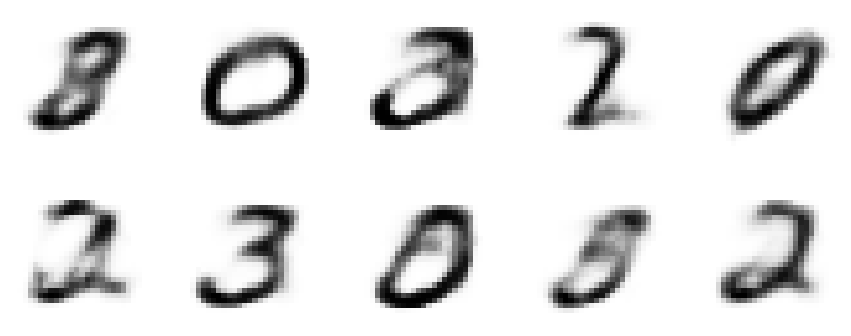

In [92]:
ax = []
fig = plt.figure(figsize=(15, 6))

for i in range(10):
    ax.append(fig.add_subplot(2, 5, i+1))
    plot_image(outvals[i].detach().numpy())

In [85]:
t.view(t.size(0), -1).size()

torch.Size([3, 3])

In [86]:
t.size()

torch.Size([3, 3])

In [15]:
t = torch.autograd.Variable(t)

In [16]:
t

tensor([[1., 2., 3.],
        [4., 5., 6.]])

2116743.7133789062

In [5]:
pip install jupyterthemes

     |████████████████████████████████| 7.0MB 1.4MB/s eta 0:00:01     |██████████                      | 2.2MB 1.8MB/s eta 0:00:03
     |████████████████████████████████| 51kB 5.1MB/s eta 0:00:01
     |████████████████████████████████| 51kB 3.3MB/s eta 0:00:01


You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
jt -t chesterish

SyntaxError: invalid syntax (<ipython-input-6-de2e746ade80>, line 1)